# Using the object-oriented interface (`BarotropicField`)

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from hn2016_falwa.barotropic_field import BarotropicField

pi = np.pi

## Example of using the object *BarotropicField* (2D flow)

In [5]:
# === Load data and coordinates ===
data_path = 'barotropic_vorticity.nc'
readFile = xr.open_dataset(data_path)
abs_vorticity = readFile.absolute_vorticity.values

xlon = np.linspace(0, 360., 512, endpoint=False)
ylat = np.linspace(-90, 90., 256, endpoint=True)
nlon = xlon.size
nlat = ylat.size
Earth_radius = 6.378e+6
dphi = (ylat[2]-ylat[1])*pi/180.
area = 2.*pi*Earth_radius**2 * (np.cos(ylat[:, np.newaxis]*pi/180.)
                                * dphi)/float(nlon) * np.ones((nlat, nlon))

### Create a *BarotropicField* object

In [6]:
cc1 = BarotropicField(xlon, ylat, pv_field=abs_vorticity)  # area computed in the class assumed uniform grid

### Compute equivalent latitude and local wave activity

In [7]:
# Compute Equivalent Latitudes
cc1_eqvlat = cc1.equivalent_latitudes

# Compute Local Wave Activity
cc1_lwa = cc1.lwa

### Plot the results

/var/folders/h3/hbcrtwbs5tz8z5ccrv_qwk4r0000gn/T/ipykernel_33267/3972112879.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)  # Absolute vorticity map


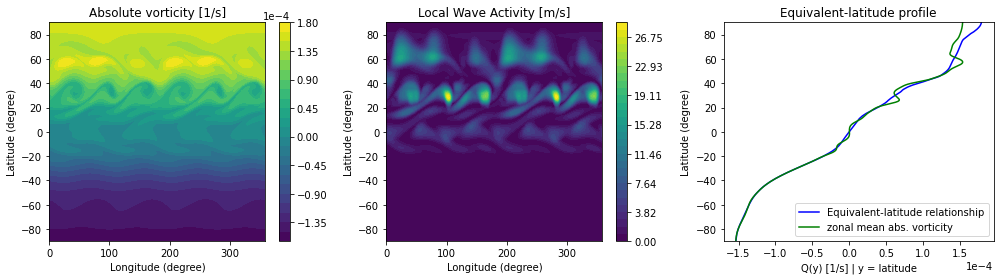

In [8]:
# --- Color axis for plotting LWA --- #
LWA_caxis = np.linspace(0, cc1_lwa.max(), 31, endpoint=True)

# --- Plot the abs. vorticity field, LWA and equivalent-latitude relationship and LWA --- #
fig = plt.subplots(figsize=(14, 4))

plt.subplot(1, 3, 1)  # Absolute vorticity map
c = plt.contourf(xlon, ylat, cc1.pv_field, 31)
cb = plt.colorbar(c)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')
cb.update_ticks()
plt.title('Absolute vorticity [1/s]')
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')

plt.subplot(1, 3, 2)  # LWA (full domain)
plt.contourf(xlon, ylat, cc1_lwa, LWA_caxis)
plt.colorbar()
plt.title('Local Wave Activity [m/s]')
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')

plt.subplot(1, 3, 3)  # Equivalent-latitude relationship Q(y)
plt.plot(cc1_eqvlat, ylat, 'b', label='Equivalent-latitude relationship')
plt.plot(np.mean(cc1.pv_field, axis=1), ylat, 'g', label='zonal mean abs. vorticity')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.ylim(-90, 90)
plt.legend(loc=4, fontsize=10)
plt.title('Equivalent-latitude profile')
plt.ylabel('Latitude (degree)')
plt.xlabel('Q(y) [1/s] | y = latitude')
plt.tight_layout()
plt.show()
